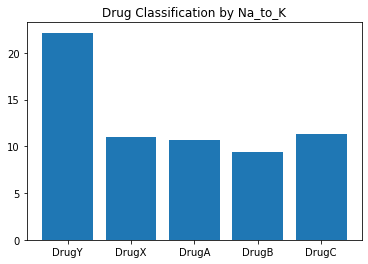

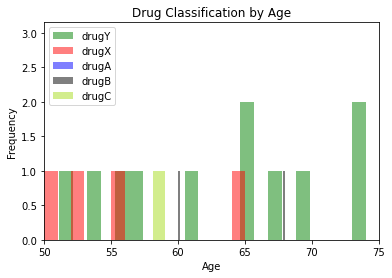

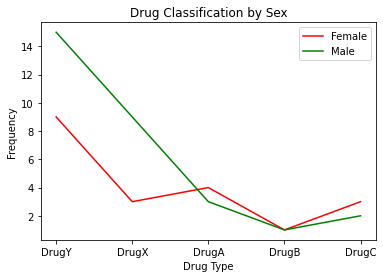

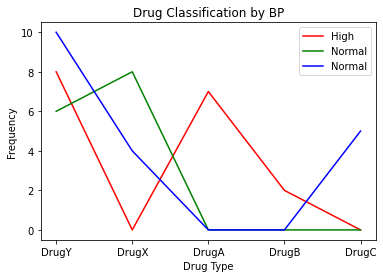

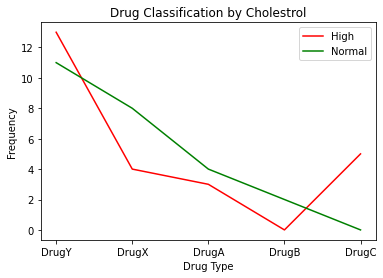

In [40]:
# Task 1, 2 and 3

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

drugList = pd.read_csv("test38.csv")


## Spliting into 5 groups
drugY = drugList.loc[drugList['Drug'] == "drugY"]
drugX = drugList.loc[drugList['Drug'] == "drugX"]
drugA = drugList.loc[drugList['Drug'] == "drugA"]
drugB = drugList.loc[drugList['Drug'] == "drugB"]
drugC = drugList.loc[drugList['Drug'] == "drugC"]


# Na_To_K
xAxis = ["DrugY", "DrugX", "DrugA", "DrugB", "DrugC"]
yAxis = [drugY['Na_to_K'].mean(), drugX['Na_to_K'].mean(), drugA['Na_to_K'].mean(), drugB['Na_to_K'].mean(), drugC['Na_to_K'].mean()]

fig1 = plt.figure(1)

plt.bar(xAxis, yAxis)

plt.title("Drug Classification by Na_to_K")

fig2 = plt.figure(2)

# Visualize Drug Y by Age
drugY_Age = drugList.loc[drugList['Drug']=='drugY', 'Age']
drugX_Age = drugList.loc[drugList['Drug']=='drugX', 'Age']
drugA_Age = drugList.loc[drugList['Drug']=='drugA', 'Age']
drugB_Age = drugList.loc[drugList['Drug']=='drugB', 'Age']
drugC_Age = drugList.loc[drugList['Drug']=='drugC', 'Age']

kwargs = dict(alpha=0.5, bins=50)

plt.hist(drugY_Age, **kwargs, color='g', label='drugY')
plt.hist(drugX_Age, **kwargs, color='r', label='drugX')
plt.hist(drugA_Age, **kwargs, color='b', label='drugA')
plt.hist(drugB_Age, **kwargs, color='k', label='drugB')
plt.hist(drugC_Age, **kwargs, color='#a7dd1c', label='drugC')
plt.xlim(50,75)
plt.legend()

plt.title("Drug Classification by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Sex
fig3 = plt.figure(3)

yAxis = [len(drugY[drugY.Sex == 'F']), len(drugX[drugX.Sex == 'F']), len(drugA[drugA.Sex == 'F']), len(drugB[drugB.Sex == 'F']), len(drugC[drugC.Sex == 'F'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'Female')

yAxis = [len(drugY[drugY.Sex == 'M']), len(drugX[drugX.Sex == 'M']), len(drugA[drugA.Sex == 'M']), len(drugB[drugB.Sex == 'M']), len(drugC[drugC.Sex == 'M'])]

plt.plot(xAxis, yAxis, color='g', label = 'Male')

plt.title("Drug Classification by Sex")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# BP
fig4 = plt.figure(4)

yAxis = [len(drugY[drugY.BP == 'HIGH']), len(drugX[drugX.BP == 'HIGH']), len(drugA[drugA.BP == 'HIGH']), len(drugB[drugB.BP == 'HIGH']), len(drugC[drugC.BP == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.BP == 'NORMAL']), len(drugX[drugX.BP == 'NORMAL']), len(drugA[drugA.BP == 'NORMAL']), len(drugB[drugB.BP == 'NORMAL']), len(drugC[drugC.BP == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

yAxis = [len(drugY[drugY.BP == 'LOW']), len(drugX[drugX.BP == 'LOW']), len(drugA[drugA.BP == 'LOW']), len(drugB[drugB.BP == 'LOW']), len(drugC[drugC.BP == 'LOW'])]

plt.plot(xAxis, yAxis, color='b', label = 'Normal')

plt.title("Drug Classification by BP")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

# Cholestrol 
fig5 = plt.figure(5)

yAxis = [len(drugY[drugY.Cholesterol == 'HIGH']), len(drugX[drugX.Cholesterol == 'HIGH']), len(drugA[drugA.Cholesterol == 'HIGH']), len(drugB[drugB.Cholesterol == 'HIGH']), len(drugC[drugC.Cholesterol == 'HIGH'])]

plt.plot(xAxis, yAxis, color = 'r', label = 'High')

yAxis = [len(drugY[drugY.Cholesterol == 'NORMAL']), len(drugX[drugX.Cholesterol == 'NORMAL']), len(drugA[drugA.Cholesterol == 'NORMAL']), len(drugB[drugB.Cholesterol == 'NORMAL']), len(drugC[drugC.Cholesterol == 'NORMAL'])]

plt.plot(xAxis, yAxis, color='g', label = 'Normal')

plt.title("Drug Classification by Cholestrol")
plt.xlabel("Drug Type")
plt.ylabel("Frequency")
plt.legend()

## Saving
pdf = PdfPages("drugClassification.pdf")
fig_nums = plt.get_fignums()
figs = [plt.figure(n) for n in fig_nums]
for fig in figs:
    fig.savefig(pdf, format='pdf')
pdf.close()

In [42]:
# Task 4 and 5
import sklearn.model_selection as model_selection
import pandas as pd
import numpy as np

drugList = pd.read_csv("drug200.csv")
drugTest = pd.read_csv("test38.csv")


drugList.BP = pd.Categorical(drugList.BP, ['LOW', 'NORMAL', 'HIGH'], ordered=True)
drugList.BP = drugList.BP.cat.codes
# drugList.BP = pd.get_dummies(drugList.BP, ['LOW', 'NORMAL', 'HIGH'])
drugList.Cholesterol = pd.Categorical(drugList.Cholesterol, ['NORMAL', 'HIGH'], ordered=True)
drugList.Cholesterol = drugList.Cholesterol.cat.codes
# drugList.Cholesterol = pd.get_dummies(drugList.Cholesterol, ['NORMAL', 'HIGH'])
drugList.Sex = pd.get_dummies(drugList.Sex, ['F', 'M'])

drugTest.BP = pd.Categorical(drugTest.BP, ['LOW', 'NORMAL', 'HIGH'], ordered=True)
drugTest.BP = drugTest.BP.cat.codes
drugTest.Cholesterol = pd.Categorical(drugTest.Cholesterol, ['NORMAL', 'HIGH'], ordered=True)
drugTest.Cholesterol = drugTest.Cholesterol.cat.codes
drugTest.Sex = pd.get_dummies(drugTest.Sex, ['F', 'M'])

print(drugList)
print(drugTest)

# X = data, Y = labels of data
X_train = drugList[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y_train = drugList['Drug']

X_test = drugTest[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y_test = drugTest['Drug']

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    1   2            1   25.355  drugY
1     47    0   0            1   13.093  drugC
2     47    0   0            1   10.114  drugC
3     28    1   1            1    7.798  drugX
4     61    1   0            1   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    1   0            1   11.567  drugC
196   16    0   0            1   12.006  drugC
197   52    0   1            1    9.894  drugX
198   23    0   1            0   14.020  drugX
199   40    1   0            0   11.349  drugX

[200 rows x 6 columns]
    Age  Sex  BP  Cholesterol  Na_to_K   Drug
0    50    0   2            1    7.490  drugA
1    46    0   1            0    7.285  drugX
2    59    1   0            1   10.444  drugC
3    55    0   1            0    7.261  drugX
4    23    0   1            1   31.686  drugY
5    32    1   0            0   10.840  drugX
6    57    0   0            0   19.128  drugY
7    47    1   0            1   11.767  drug

In [52]:
# Task 6
# a) Gaussian NB

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

accu = []
avg = []
weighted = []

for i in range(10):
  GaussB = GaussianNB()
  GaussB.fit(X_train, Y_train)

  Y_expect = Y_test
  Y_predict = GaussB.predict(X_test)

  acc = accuracy_score(Y_test, Y_predict) * 100
  f1_avg = f1_score(Y_test, Y_predict, average='macro')
  f1_weighted = f1_score(Y_test, Y_predict, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predict)

  matrix = confusion_matrix(Y_test, Y_predict)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

[86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0]
[0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521, 0.8775203252032521]
[0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715, 0.8712154471544715]
[[ 7  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 1  0  6  0 17]]
              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       1.00      1.00      1.00         2
       drugC       0.45      1.00      0.62         5
       drugX       1.00      1.00      1.00        12
       drugY       1.00      0.71      0.83        24

    accuracy                           0.86        50
   macro avg       0.87      0.94      0.88        50
weighted avg

In [53]:
 # Task 6
# b) Base-Decision-Tree

from sklearn.tree import DecisionTreeClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()
  DTClassifier.fit(X_train, Y_train)

  Y_predicted = DTClassifier.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))
print(report)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[[ 7  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy Average:  100.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  1.0
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  1.0
F1 Weighted Standard deviation:  0.0
              precision    recall  f1-score   support

       drugA 

In [55]:
# Task 6
# c) Top-Decision-Tree

from sklearn.model_selection import GridSearchCV
accu = []
avg = []
weighted = []
matrix = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()

  params = {
      "criterion": ["gini", "entropy"],
      "max_depth": [5,15],
      "min_samples_split": [2,7,15]
  }

  clf = GridSearchCV(DTClassifier, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[[ 7  0  0  0  0]
 [ 0  2  

In [57]:
# Task 6
# d) Perceptron

from sklearn.linear_model import Perceptron
print("Training Perceptron:\n")

accu = []
avg = []
weighted = []

for i in range(10):
  clf = Perceptron()
  clf.fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Training Perceptron:



F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\skle

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974, 0.12972972972972974]
[0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514, 0.3113513513513514]
[[ 0  0  0  0  7]
 [ 0  0  0  0  2]
 [ 0  0  0  0  5]
 [ 0  0  0  0 12]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         5
       drugX       0.00      0.00      0.00        12
       drugY       0.48      1.00      0.65        24

    accuracy                           0.48        50
   macro avg       0.10      0.20      0.13        50
we

F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\skle

In [58]:
# Task 6
# e) Base-MLP
from sklearn.neural_network import MLPClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd').fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 

[57.99999999999999, 57.99999999999999, 57.99999999999999, 57.99999999999999, 56.00000000000001, 57.99999999999999, 56.00000000000001, 56.00000000000001, 57.99999999999999, 57.99999999999999]
[0.24681967213114753, 0.24681967213114753, 0.24681967213114753, 0.24681967213114753, 0.23298826777087647, 0.24681967213114753, 0.2317204301075269, 0.23298826777087647, 0.24681967213114753, 0.24681967213114753]
[0.47716721311475413, 0.47716721311475413, 0.47716721311475413, 0.47716721311475413, 0.4548240165631469, 0.47716721311475413, 0.4561290322580645, 0.4548240165631469, 0.47716721311475413, 0.47716721311475413]
[[ 0  0  0  2  5]
 [ 0  0  0  2  0]
 [ 0  0  0  2  3]
 [ 0  0  0  6  6]
 [ 0  0  0  1 23]]
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         5
       drugX       0.46      0.50      0.48        12
       drugY       0.62      

F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 

In [50]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

params = {
    "activation": ["logistic", "tanh", "relu", "identity"],
    "hidden_layer_sizes": [(30, 50), (10, 10, 10)],
    "solver": ["adam","sgd"]
}

accu = []
avg = []
weighted = []

for i in range(10):
  clf = GridSearchCV(mlp, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)
  report = classification_report(Y_test, Y_predicted)

  matrix = confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print(matrix)
print(report)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_netw

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}
[80.0, 76.0, 80.0, 78.0, 82.0, 80.0, 78.0, 74.0, 88.0, 78.0]
[0.631132075471698, 0.560392156862745, 0.6266968325791856, 0.6188536953242837, 0.6989019607843137, 0.6266968325791856, 0.6169082125603864, 0.5297035040431266, 0.8244704570791527, 0.6169082125603864]
[0.7580503144654088, 0.7256078431372549, 0.7612518853695324, 0.7424283559577677, 0.8012313725490194, 0.7612518853695324, 0.7369565217391305, 0.6930026954177899, 0.8725696767001115, 0.7369565217391305]
Accuracy Average:  79.4
Accuracy Standard deviation:  3.5832945734337835
F1 Macro Average:  0.6350663939844464
F1 Macro Standard deviation:  0.07596336462626874
F1 Weighted Average:  0.7589307072444678
F1 Weighted Standard deviation:  0.04627060164114183


F:\Programs\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Programs\AnacondaPython\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score 